# Análise da diferença de imagens

### Neste exercício utilizaremos o conjunto de dados da FEI + duas fotos inéditas
- Faça o download do conjunto de dados: https://fei.edu.br/~cet/frontalimages_manuallyaligned_part1.zip
- Descompacte o conjunto e dados no mesmo diretório deste arquivo
- Copie as duas imagens inéditas para o mesmo diretório deste arquivo

##### Passo 1: Importar as bibliotecas necessárias

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

##### Passo 2: Importar o conjunto de dados da FEI

In [2]:
# Criando uma variável para armazenar as imagens
dataset = []

# Criando um laço de repetição para importar cada imagem
for file in glob.glob("frontalimages_manuallyaligned_part1/*.jpg"):
    # Carredando a imagem do índice
    load_file = Image.open(file)
    # Convertendo a imagem e tons de cinza
    load_file = load_file.convert("L")
    # Convertendo o objeto imagem em array
    load_file = np.array(load_file)
    # Adicionando a array da na variável dataset
    dataset.append(load_file)
# Convertendo a lista de imagens em array
dataset = np.array(dataset)

In [3]:
# Dimensão do conjunto de dados
dataset.shape

(200, 360, 260)

##### Passo 3: Importar as duas fotos inéditas

In [4]:
foto_neutra = np.array(Image.open('minha_foto_a.jpg').convert('L'))
foto_sorrindo= np.array(Image.open('minha_foto_b.jpg').convert('L'))

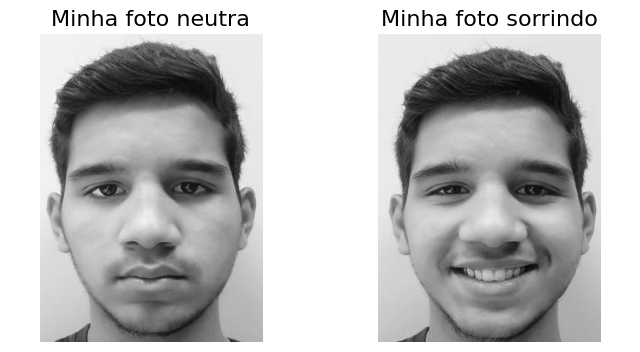

Dimensões das fotos - Foto Neutra: (360, 260) | Foto Sorrindo: (360, 260)


In [6]:
plt.figure(figsize=(8,4))
plt.axis('off')

plt.subplot(1,2,1)
plt.imshow(foto_neutra, cmap='gray')
plt.title('Minha foto neutra', fontsize=16)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(foto_sorrindo, cmap='gray')
plt.title('Minha foto sorrindo', fontsize=16)
plt.axis('off')

plt.show()

print(f'Dimensões das fotos - Foto Neutra: {foto_neutra.shape} | Foto Sorrindo: {foto_sorrindo.shape}')


##### Passo 4: Calcular a diferença das fotos inéditas em relação ao conjunto de dados da FEI

In [9]:
indice = dataset.shape[0]

dif_neutral = np.zeros(indice)
dif_smilling = np.zeros(indice)

for img in range(indice):
    dif_neutral[img] = np.sum(np.abs(dataset[img, :, :] - foto_neutra))
    dif_smilling[img] = np.sum(np.abs(dataset[img, :, :] - foto_sorrindo))


In [10]:
df_dif_neutral = pd.DataFrame(dif_neutral, columns = ['Diferença'])
df_dif_neutral

,Diferença
0,15841136.0
1,15431263.0
2,17141174.0
3,17270494.0
4,16079375.0
...,...
195,15236178.0
196,13581153.0
197,13901113.0
198,17154850.0


In [11]:
s_dif_neutral = df_dif_neutral.sort_values(by = 'Diferença').head(5)
s_dif_neutral

,Diferença
61,13299157.0
60,13439793.0
196,13581153.0
197,13901113.0
165,14451423.0


In [12]:
id_neutral = list(s_dif_neutral.index)
id_neutral

[61, 60, 196, 197, 165]

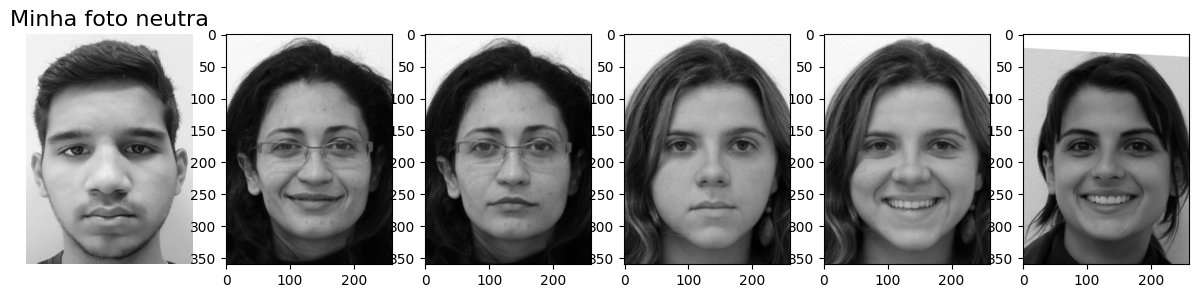

In [13]:
plt.subplots(figsize =(15,3))
plt.axis('off')
plt.subplot(1, len(id_neutral)+1,1)
plt.imshow(foto_neutra, cmap = 'gray')
plt.title('Minha foto neutra', fontsize = 16)
plt.axis('off')

position = 2
for id_img in id_neutral:
    plt.subplot(1, len(id_neutral)+ 1, position)
    position += 1
    plt.imshow(dataset[id_img,:,:], cmap = 'gray')

In [15]:
df_neutral_r = df_dif_neutral.sort_values(by='Diferença', ascending=False).head(5)

id_neutral_r = list(df_neutral_r.index)
id_neutral_r

[172, 22, 101, 58, 182]

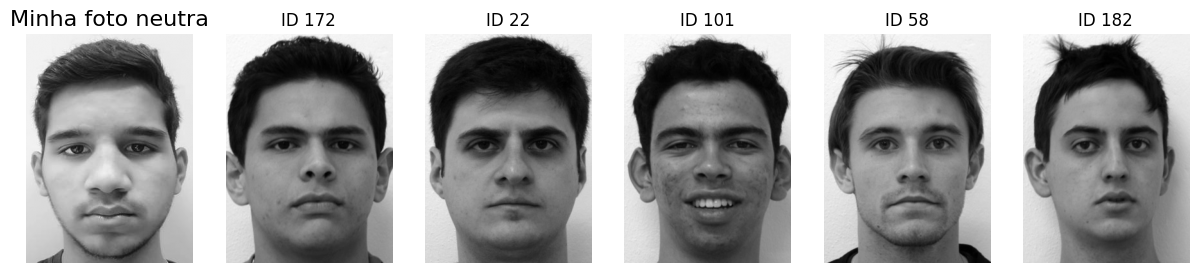

In [17]:
plt.figure(figsize=(15,3))
plt.axis('off')

# Foto de referência
plt.subplot(1, len(id_neutral_r) + 1, 1)
plt.imshow(foto_neutra, cmap='gray')
plt.title('Minha foto neutra', fontsize=16)
plt.axis('off')

# Outras imagens
position = 2
for id_img in id_neutral_r:
    plt.subplot(1, len(id_neutral_r) + 1, position)
    position += 1
    plt.imshow(dataset[id_img, :, :], cmap='gray')
    plt.title(f"ID {id_img}")
    plt.axis('off')

plt.show()


#### Repetindo o processo para foto sorrindo...

In [18]:
df_dif_smilling = pd.DataFrame(dif_smilling, columns = ['Diferença'])
df_dif_smilling

,Diferença
0,16034710.0
1,15824773.0
2,16851164.0
3,17019140.0
4,15810613.0
...,...
195,15762552.0
196,13839239.0
197,14840927.0
198,16759624.0


In [20]:
s_dif_smilling = df_dif_smilling.sort_values(by = 'Diferença').head(5)
s_dif_smilling

,Diferença
60,13403223.0
61,13526011.0
196,13839239.0
197,14840927.0
165,14856197.0


In [21]:
id_smilling = list(s_dif_smilling.index)
id_smilling

[60, 61, 196, 197, 165]

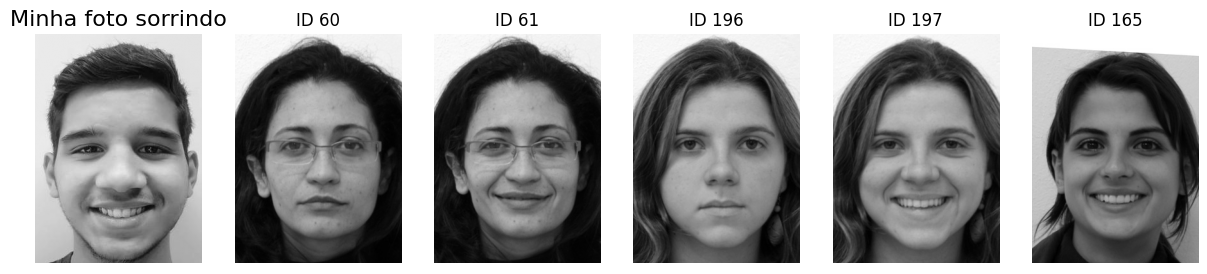

In [22]:
plt.figure(figsize=(15,3))
plt.axis('off')

# Foto de referência
plt.subplot(1, len(id_smilling) + 1, 1)
plt.imshow(foto_sorrindo, cmap='gray')
plt.title('Minha foto sorrindo', fontsize=16)
plt.axis('off')

# Outras imagens
position = 2
for id_img in id_smilling:
    plt.subplot(1, len(id_smilling) + 1, position)
    position += 1
    plt.imshow(dataset[id_img, :, :], cmap='gray')
    plt.title(f"ID {id_img}")
    plt.axis('off')

plt.show()


In [23]:
df_smilling_r = df_dif_smilling.sort_values(by='Diferença', ascending=False).head(5)

id_smilling_r = list(df_smilling_r.index)
id_smilling_r

[59, 160, 58, 161, 23]

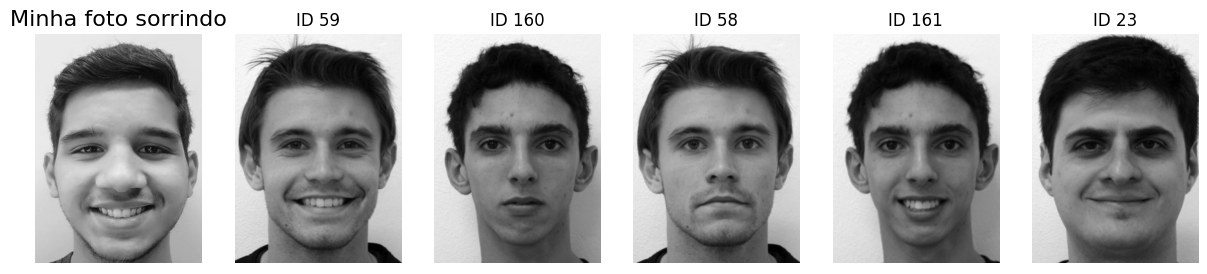

In [24]:
plt.figure(figsize=(15,3))
plt.axis('off')

# Foto de referência
plt.subplot(1, len(id_smilling_r) + 1, 1)
plt.imshow(foto_sorrindo, cmap='gray')
plt.title('Minha foto sorrindo', fontsize=16)
plt.axis('off')

# Outras imagens
position = 2
for id_img in id_smilling_r:
    plt.subplot(1, len(id_smilling_r) + 1, position)
    position += 1
    plt.imshow(dataset[id_img, :, :], cmap='gray')
    plt.title(f"ID {id_img}")
    plt.axis('off')

plt.show()
